In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
train = pd.read_csv('titanic_train.csv')

## Exploring the data

In [99]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [100]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Identify missing data

In [102]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

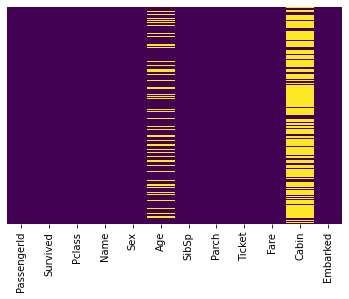

In [103]:
sns.heatmap(train.isnull(), cbar=False, cmap='viridis', yticklabels=False);

**It seems like we miss some data from the age column, the majority of the Cabin class data is missing 

## More data visulization

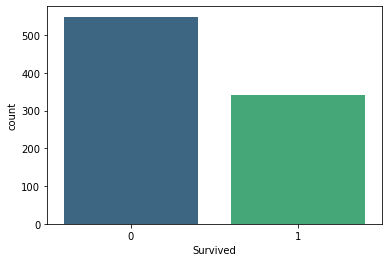

In [104]:
sns.countplot(x='Survived', data=train, palette='viridis');

**The target is a little unbalanced

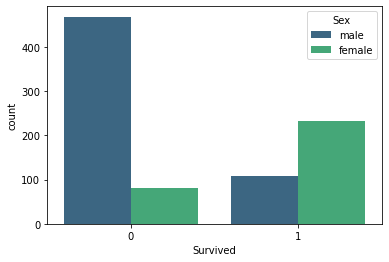

In [105]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='viridis');

**A lot more males did not survive compared with female (almost 5 times)

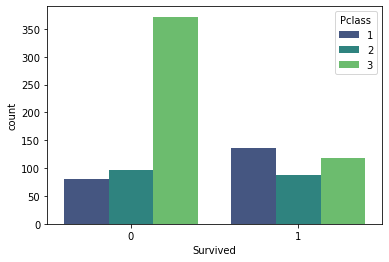

In [106]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='viridis');

**A big portion of people who did not survive are from third class

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



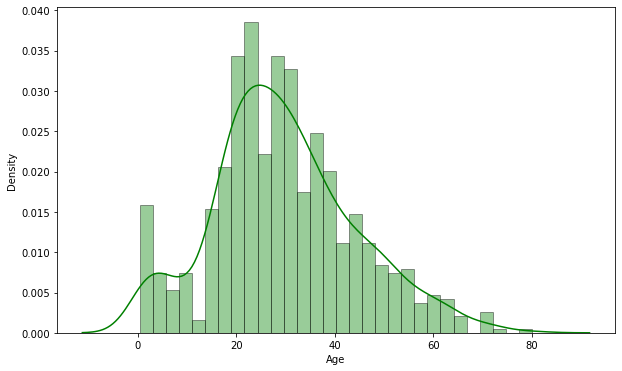

In [107]:
sns.distplot(train['Age'].dropna(), bins=30, color='g', hist_kws=dict(edgecolor='black'))
fig = plt.gcf()
fig.set_size_inches(10,6)

**Most people are between 18 and 40ish

/Users/david/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



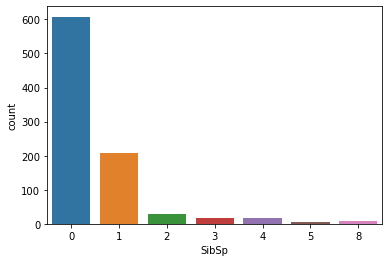

In [108]:
sns.countplot('SibSp', data=train);

**Most of the ppl on board do not have sibllings

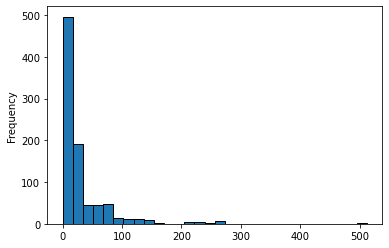

In [109]:
train['Fare'].plot.hist(bins=30, edgecolor='black'); # most ppl paid 100 or less

# filling the missing data

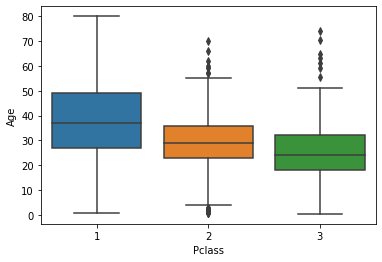

In [110]:
sns.boxplot(x='Pclass', y='Age', data=train); # seems like ppl in higer class tend to be older

In [111]:
train.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [112]:
# let's then define a function to fill those missing age value based on Pclass
def fill_age_value(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age): # this is saying if Age is missing in the dataset
        if Pclass == 1:
            return 38
        elif Pclass ==2:
            return 30
        else:
            return 25
    else: 
        return Age

In [113]:
train['Age']= train[['Age', 'Pclass']].apply(fill_age_value, axis=1)

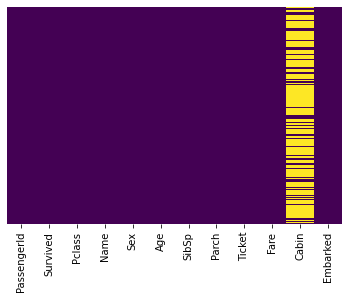

In [114]:
sns.heatmap(train.isnull(), cmap='viridis', yticklabels=[], cbar=False); # as we can see the missing values are filled

# Feature Engineering 

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
# first of all, Let's drop the Cabin column
train.drop('Cabin', axis=1, inplace=True)

In [117]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [118]:
# now, let's replace the Sex values with 1, and 0
scaler_sex = {'male':1, 'female':0}

In [119]:
train['Sex'] = train['Sex'].replace(scaler_sex)

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [121]:
train = train.drop(['Name','Ticket'], axis=1)

In [122]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


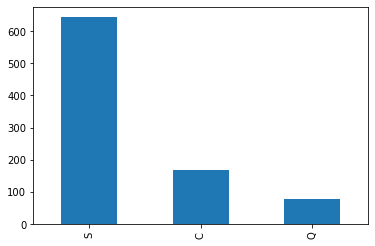

In [123]:
train['Embarked'].value_counts().plot.bar(); # Embarked column has three different values, let's then get the dummies values of them 

In [124]:
train = pd.get_dummies(train)

In [125]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,0,0,1
1,2,1,1,0,38.0,1,0,71.2833,1,0,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1
3,4,1,1,0,35.0,1,0,53.1000,0,0,1
4,5,0,3,1,35.0,0,0,8.0500,0,0,1


# Build a LogisticRegression model

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [150]:
X = train.drop('Survived', axis=1).copy()
y = train['Survived']

In [151]:
Xtrain,Xtest,ytrain,ytest = train_test_split (X,y, test_size=0.3, random_state=42)

In [152]:
log=LogisticRegression(solver='lbfgs', max_iter=100000).fit(Xtrain,ytrain)

In [153]:
prediction = log.predict(Xtest)

# Evaluation of the model

In [154]:
from sklearn.metrics import classification_report, confusion_matrix

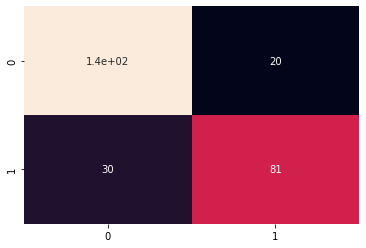

In [155]:
sns.heatmap(confusion_matrix(ytest, prediction), annot=True, cbar=False);

In [156]:
print(classification_report(ytest, prediction)) # Not so bad! 

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

